# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from scipy.special import inv_boxcox
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## read the datset from your local drive
from google.colab import files
upload = files.upload()

Saving train.csv to train.csv


In [ ]:
## upload the dataset
import pandas as pd
df = pd.read_csv('train.csv')

In [ ]:
## functions that you can use to learn your dataset
df.head(5)
df.info() ## used to figure which variables are catagorical, continuous, or labeled as text frame.
df.describe() ## for each numerical variable, it gives a quick summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
## create dataframe for numeric + categorical features separately
## use select_dtypes()
numeric_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['object'])

In [ ]:
## find out the feature names of the continuous and categorical var
## find out the dimension of numeric_df and categorical_df
numeric_df.columns
categorical_df.columns
print ("Continuous var: ", numeric_df.columns)
print ("Categorical var: ", categorical_df.columns)

numeric_df.shape
categorical_df.shape
print("\nDimensions of numeric_df:", numeric_df.shape)
print("Dimensions of categorical_df:", categorical_df.shape)

Continuous var:  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical var:  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 

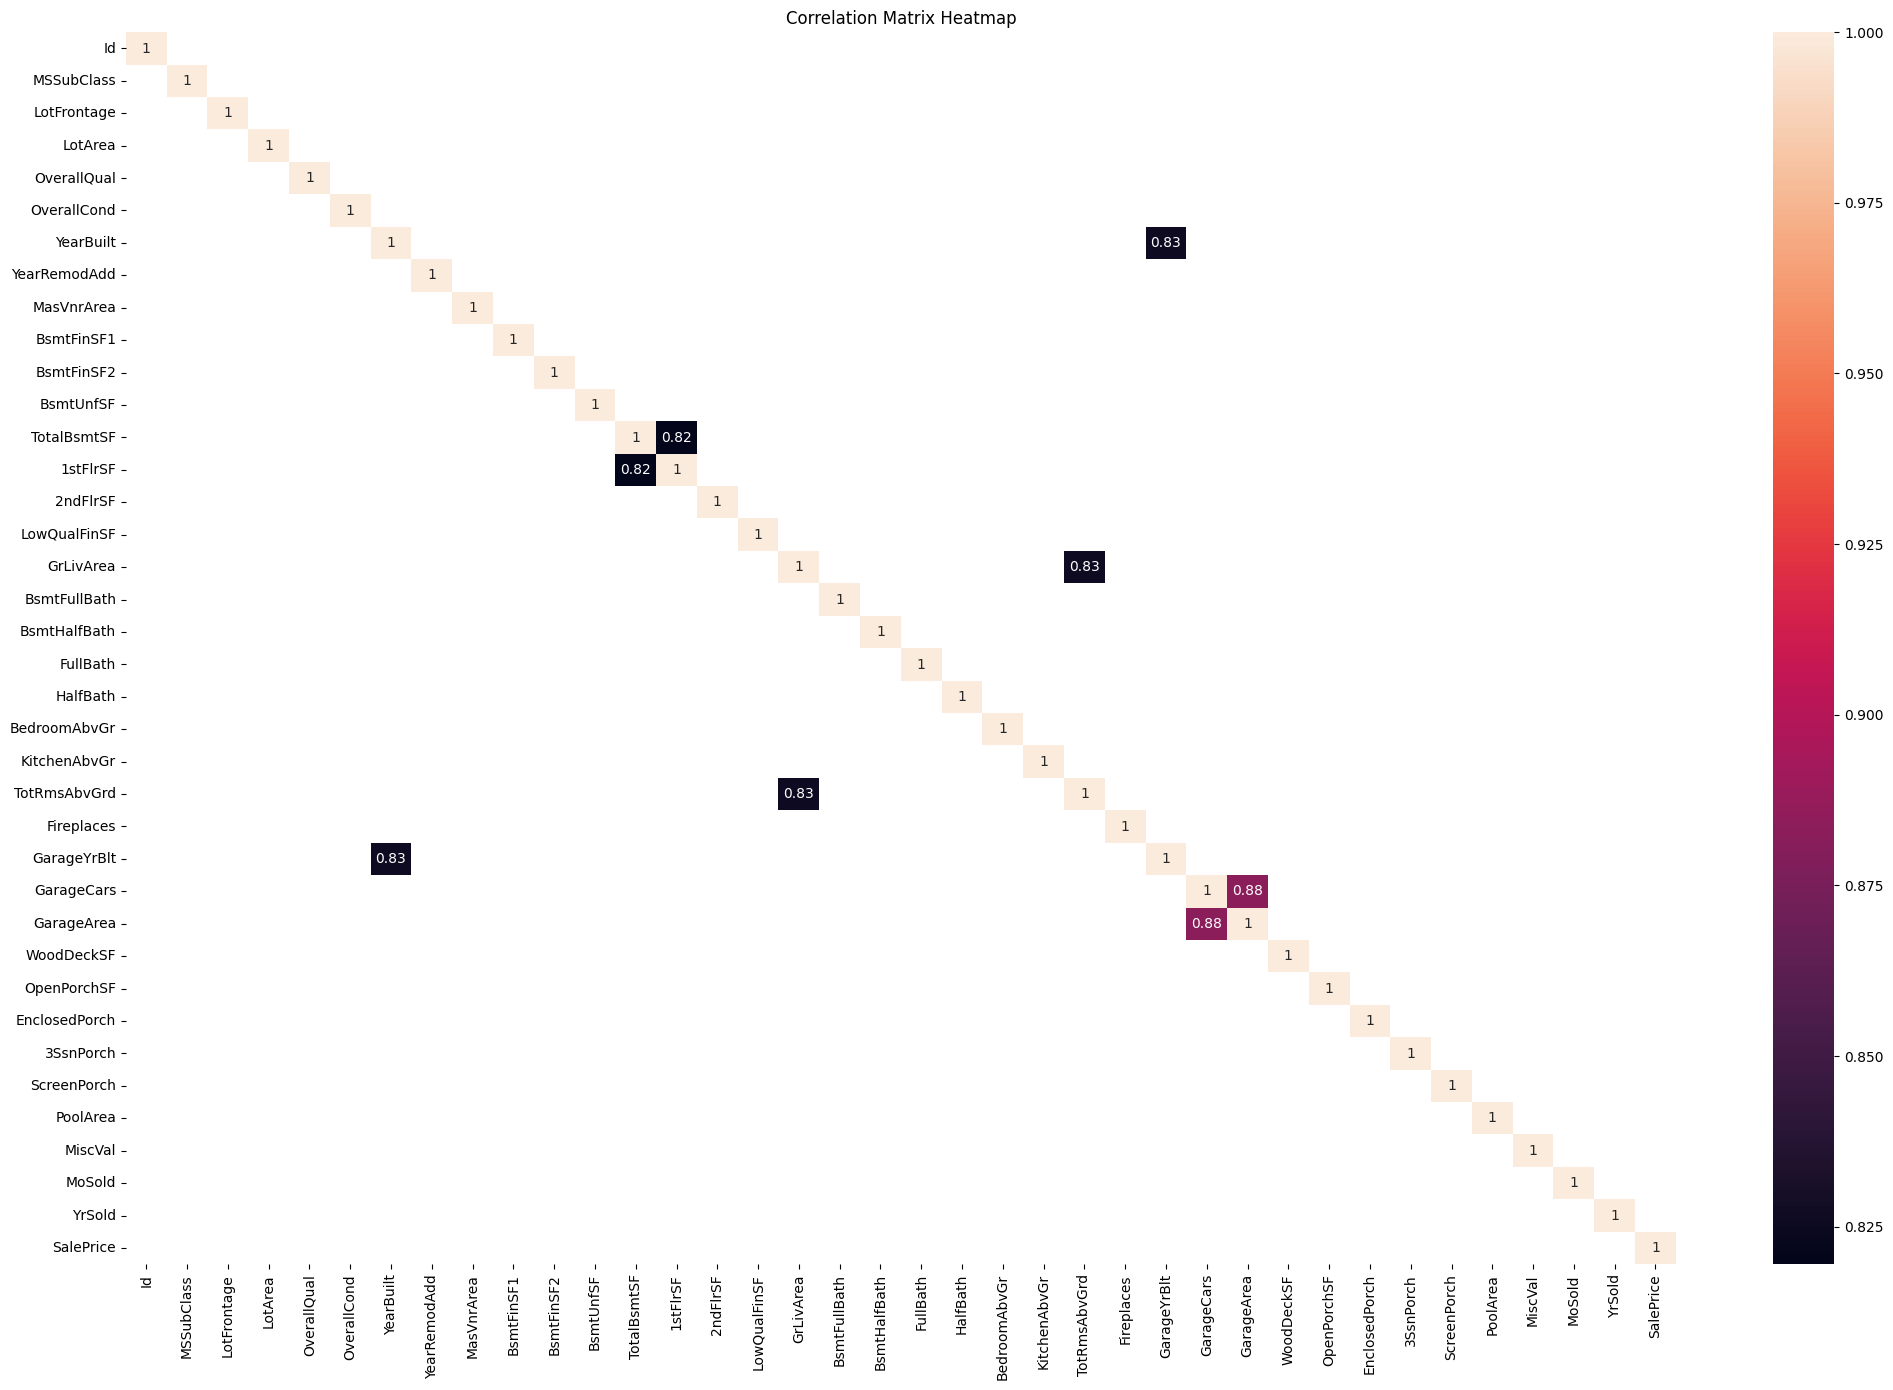

In [ ]:
## linear regression
## make a correlation heatmap

corr_matrix = numeric_df.corr()
plt.figure(figsize=(25,16))

sns.heatmap(corr_matrix[corr_matrix>0.8], annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

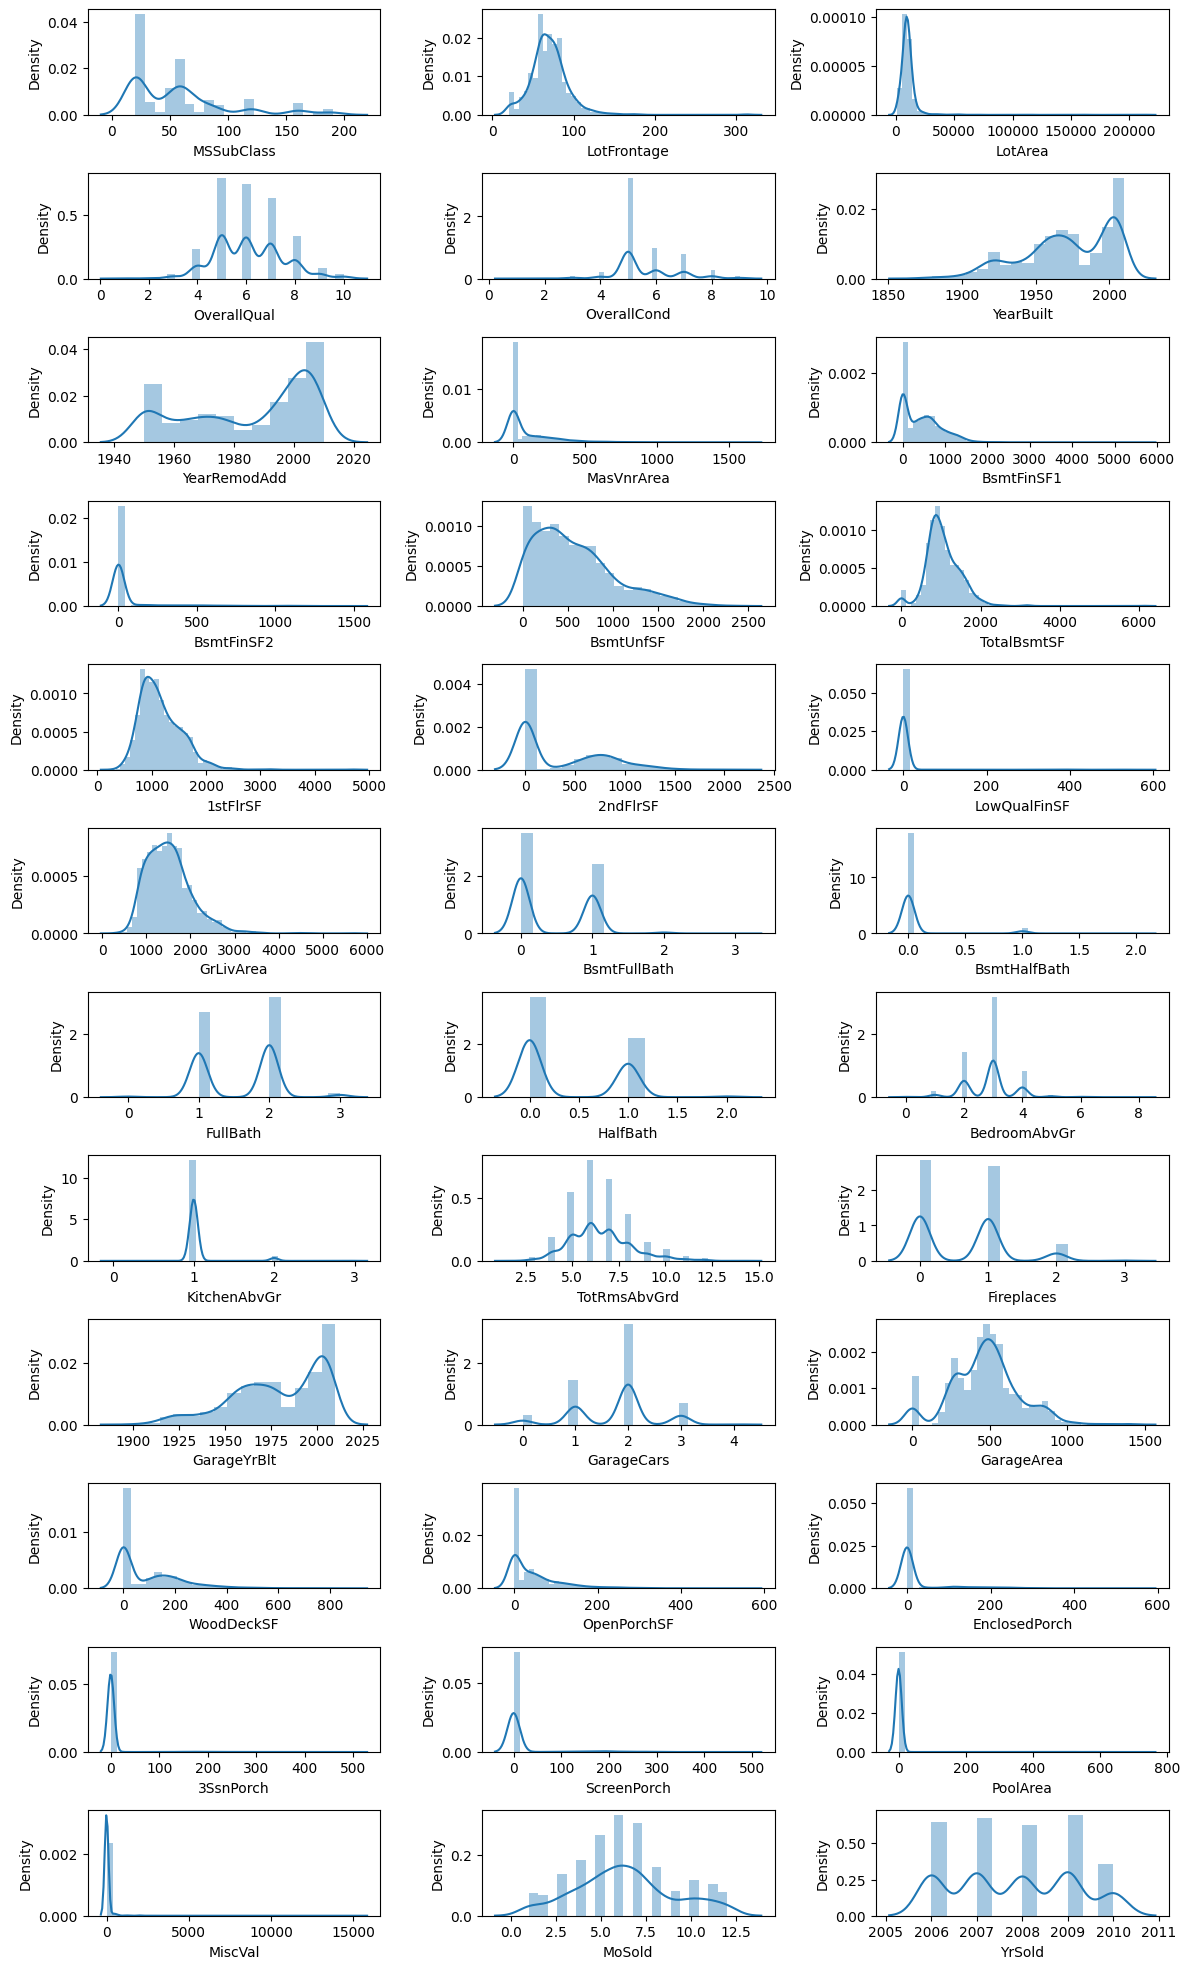

In [ ]:
## Univariate Data Analysis
fig=plt.subplots(figsize=(12, 21))
i=0
for feature in numeric_df.columns:
    if feature not in ['Id', 'SalePrice']:
        i+=1
        plt.subplot(13, 3, i)
        sns.distplot(df[feature])
        plt.tight_layout()

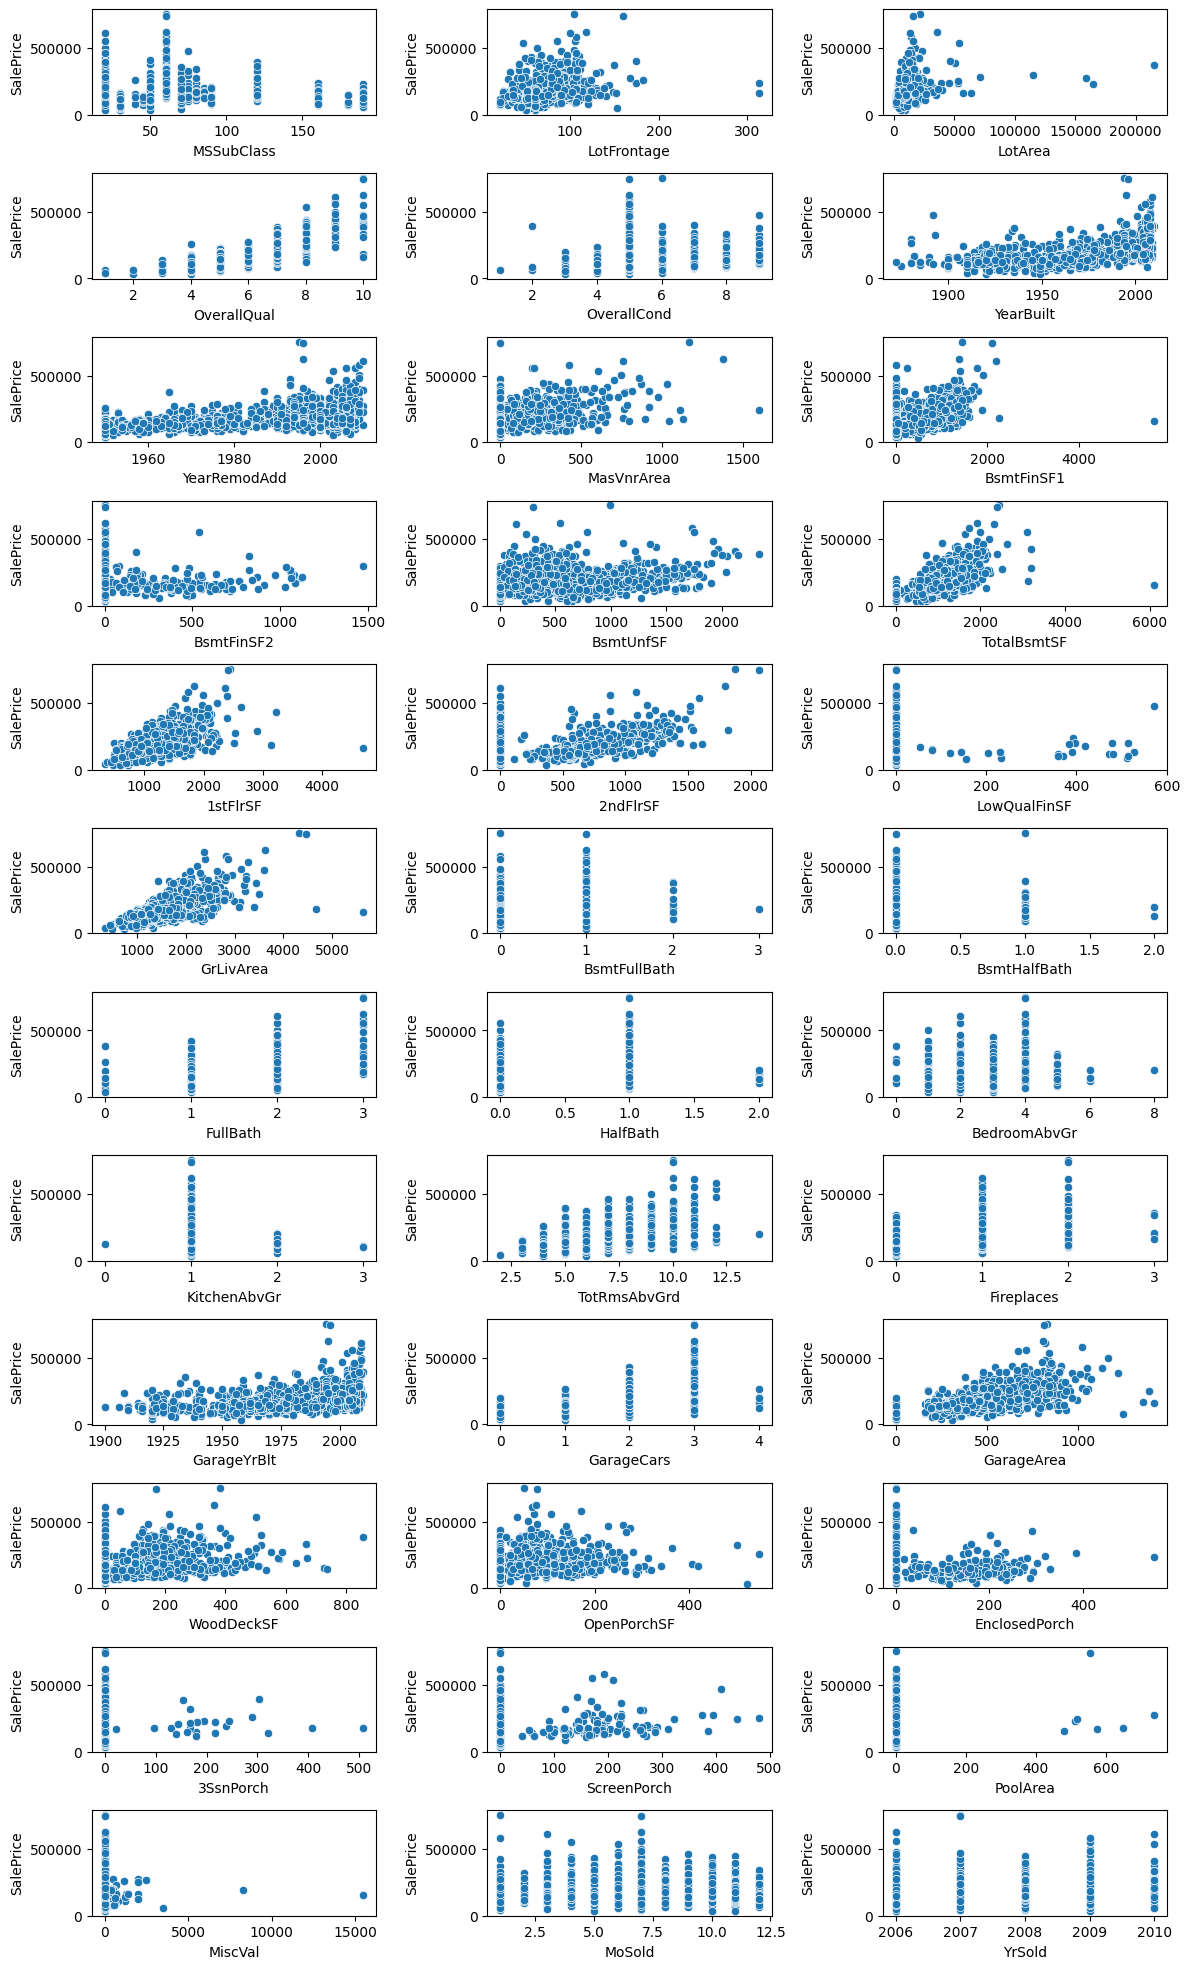

In [ ]:
## see if univariate variable has strong correlation
## with the target variable using a scatterplot
fig=plt.subplots(figsize=(12, 21))
i=0
for feature in numeric_df.columns:
    if feature not in ['Id', 'SalePrice']:
        i+=1
        plt.subplot(13, 3, i)
        sns.scatterplot(numeric_df, x=feature, y='SalePrice')
        plt.tight_layout()

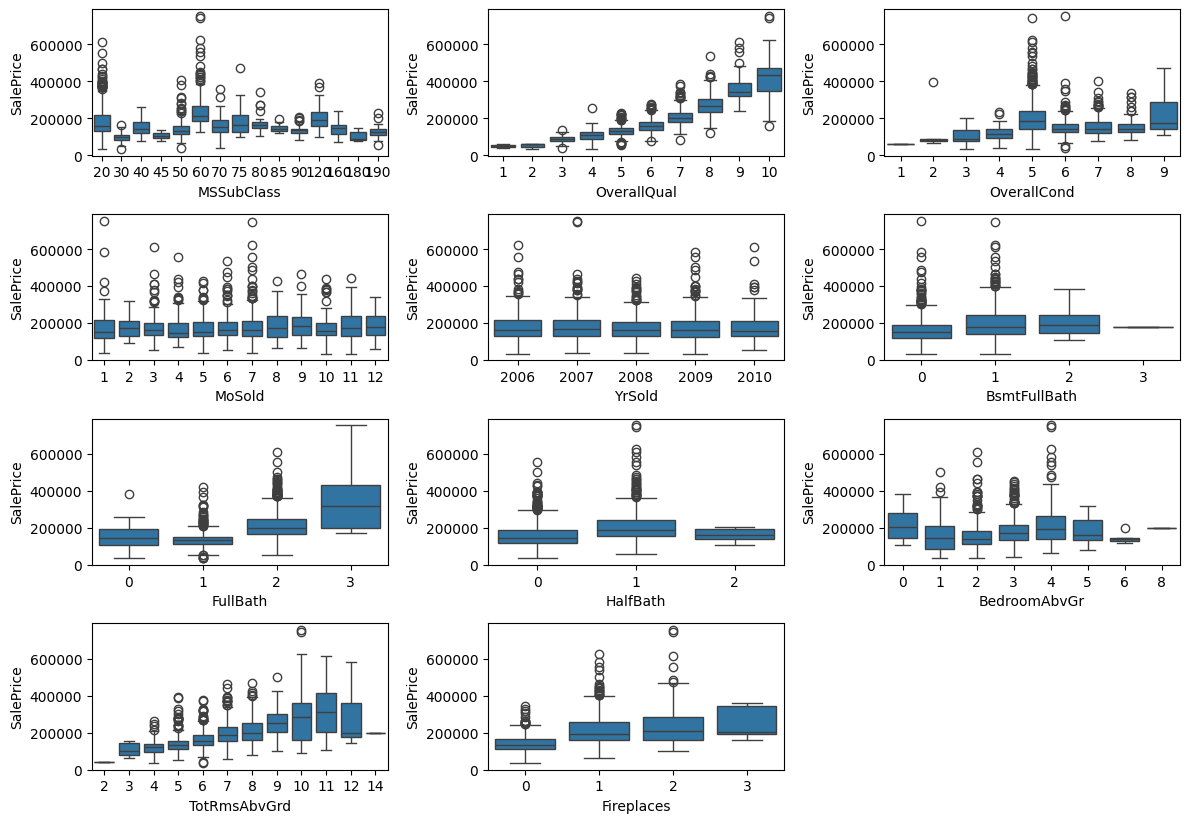

In [ ]:
## Use Boxplot to learn the relationship between the categorical variable and the target
## ['MSSubClass','OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath',
## 'FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces']
fig=plt.subplots(figsize=(12, 12))
for i, feature in enumerate(['MSSubClass','OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces']):
    plt.subplot(6, 3, i+1)
    sns.boxplot(numeric_df, x=numeric_df[feature],y=numeric_df['SalePrice'])
    plt.tight_layout()

In [ ]:
## convert the year related features into number of years
for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    df[feature] = 2022 - df[feature]

In [ ]:
## find the categorical variable names
categorical_df.columns.sort_values()

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [ ]:
## Put some of the variables into different subclasses
bsmt_df = categorical_df[['BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'BsmtQual']]
garage_df = categorical_df[['GarageCond','GarageFinish', 'GarageQual', 'GarageType']]
sale_df = categorical_df[['SaleCondition', 'SaleType']]
exterior_df = categorical_df[['ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd']]
heating_df = categorical_df[['Heating', 'HeatingQC','Electrical','FireplaceQu']]
land_df = categorical_df[['LandContour', 'LandSlope', 'Street', 'Alley','PavedDrive', 'Fence']]

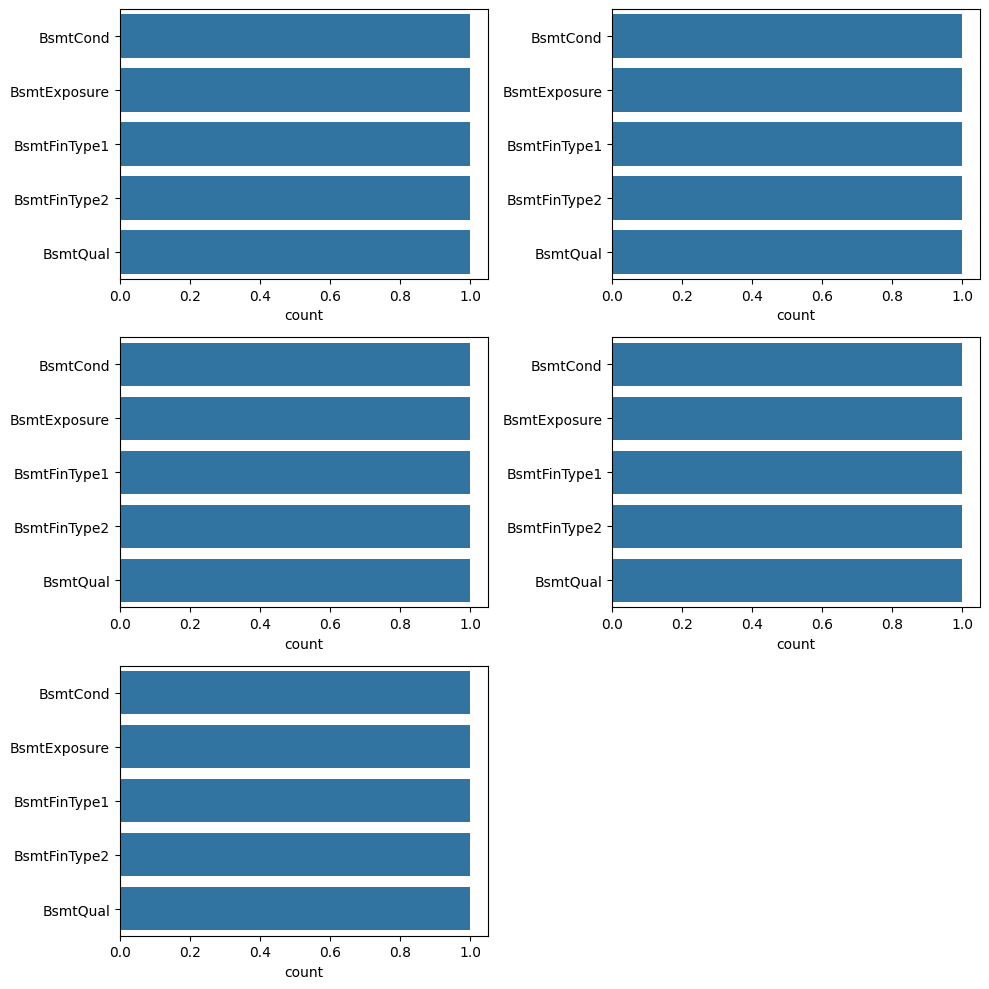

In [ ]:
fig=plt.subplots(figsize=(10, 10))
for i,col in enumerate(bsmt_df.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(bsmt_df.columns)
    plt.tight_layout()

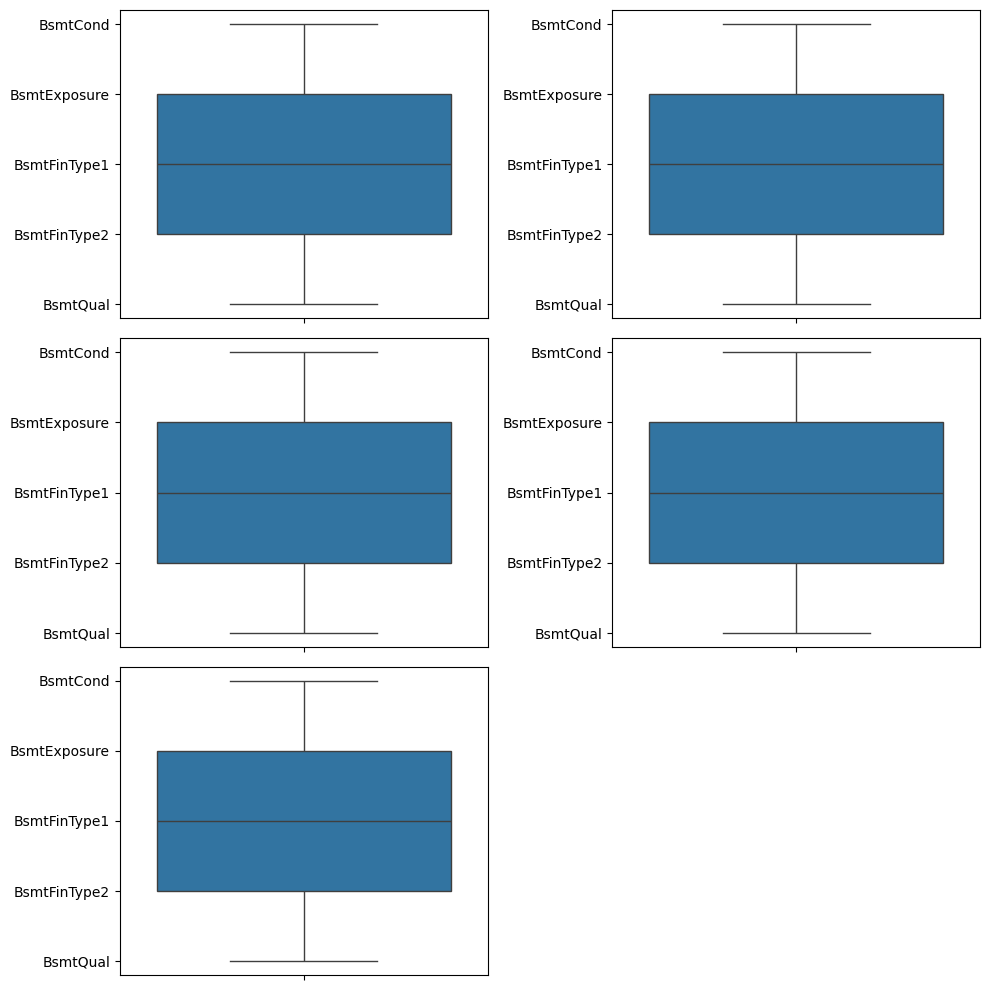

In [ ]:
## Use boxplot to examine the relationship between sale price and all basement related variables
fig=plt.subplots(figsize=(10,10))
for i,col in enumerate(bsmt_df.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(bsmt_df, x=bsmt_df[col], y = numeric_df['SalePrice'])
    plt.tight_layout()

# Feature Engineering

In [ ]:
## Remove one of the high correlated from pairs checked using heatmap
removeFeats = ['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF', 'BedroomAbvGr']
df.drop(removeFeats, axis=1, inplace=True)
print(df.columns.shape)

(76,)


In [ ]:
## From EDA, remove numerical features having 1 unique value as occuring more than 99%
toDrop= ['BsmtFinSF2', 'LowQualFinSF', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea','MiscVal']
numeric_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['object'])
numeric_df['BsmtFinSF2'].value_counts(normalize=True, sort=True, ascending=False)[0]

for c in toDrop:
    ## fill out the code here
    if float(numeric_df[c].value_counts(normalize=True, sort=True, ascending=False)[0]) >= 0.99:
      df.drop(c, axis=1, inplace=True)

print(df.columns.shape)

(75,)


In [ ]:
## Check percentage of missing values
## Checking % of null values
for feat in df.columns:
    if df[feat].isnull().any():
        print(feat, ' : ',  round(df[feat].isnull().sum()/df.shape[0], 2)*100)

LotFrontage  :  18.0
Alley  :  94.0
MasVnrType  :  1.0
MasVnrArea  :  1.0
BsmtQual  :  3.0
BsmtCond  :  3.0
BsmtExposure  :  3.0
BsmtFinType1  :  3.0
BsmtFinType2  :  3.0
Electrical  :  0.0
FireplaceQu  :  47.0
GarageType  :  6.0
GarageFinish  :  6.0
GarageQual  :  6.0
GarageCond  :  6.0
PoolQC  :  100.0
Fence  :  81.0
MiscFeature  :  96.0


In [ ]:
## Since MasVnrArea has only 1% data missing,
## dropping rows with NULL values in MasVnrArea
df.dropna(subset= ['MasVnrArea'],axis=0, inplace=True)

# Dropping Id column as it does not contribute towards predicting SalePrice
df.drop(['Id'], axis=1, inplace=True)
df.shape

(1452, 74)

In [ ]:
print(df['Electrical'].isnull().sum())

## dropping rows with null values in 'Electrical', for very low missing value count
## using dropna function
df.dropna(subset= ['Electrical'],axis=0, inplace=True)
df.shape

1


(1451, 74)

In [ ]:
##  dropping 'PoolQC' for very high percentage of missing value and
## highly imbalance data (if missing value is imputed)
df.drop(['PoolQC'], axis=1, inplace=True)

# Should I remove the MiscFeatures and Alley features
Information:

For 'Alley', Nan means 'No access to alley'

For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'

For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'

For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively

MiscFeature - Nan means no additional features mentioned.

All these features can be imputed by making them into one category in place of missing data.

In [ ]:
## Some categorical features have NAN values which denotes to a particular class.
impute_cat_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', \
                       'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish',\
                       'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(df[impute_cat_features].isnull().sum())

## fill out the NA values as string 'NA_'+ feature names to make it a category
for feat in impute_cat_features:
  df[feat].fillna(value='NA_' + feat, inplace=True)

Alley           1361
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      685
Fence           1170
MiscFeature     1397
dtype: int64


In [ ]:
### Encoding ordinal categorical features
df['ExterQual'] = df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond'] = df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df['BsmtQual'].map({'NA_BsmtQual':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df['BsmtCond'].map({'NA_BsmtCond':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df['BsmtExposure'].map({'NA_BsmtExposure':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA_BsmtFinType1':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA_BsmtFinType2':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['KitchenQual'] = df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df['GarageFinish'].map({'NA_GarageFinish':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df['GarageQual'].map({'NA_GarageQual':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df['GarageCond'].map({'NA_GarageCond':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['FireplaceQu'] = df['FireplaceQu'].map({'NA_FireplaceQu':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA_Alley,Reg,Lvl,AllPub,Inside,...,0,0,NA_Fence,NA_MiscFeature,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NA_Alley,Reg,Lvl,AllPub,FR2,...,0,0,NA_Fence,NA_MiscFeature,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NA_Alley,IR1,Lvl,AllPub,Inside,...,0,0,NA_Fence,NA_MiscFeature,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NA_Alley,IR1,Lvl,AllPub,Corner,...,0,0,NA_Fence,NA_MiscFeature,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NA_Alley,IR1,Lvl,AllPub,FR2,...,0,0,NA_Fence,NA_MiscFeature,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1451, 73)

In [ ]:
## One hot encoding on nominal features
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2',
                      'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                      'Electrical', 'GarageType','PavedDrive', 'Fence', 'MiscFeature', 'SaleType','SaleCondition','LotShape',
                      'Utilities', 'LandSlope', 'HouseStyle', 'CentralAir', 'Functional']

## use pd.get_dummies to apply one hot encoding on nomial features and set
## drop_first to True, name the new dataframe as dummy_df
dummy_df = pd.get_dummies(df[unordered_features], drop_first=True)

In [ ]:
dummy_df.shape

(1451, 164)

In [ ]:
## Dropping those classes which are present less than/equal to 1% of the observations.
dummy_cols_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.98:
        dummy_cols_drop.append(feat)
    elif dummy_df[feat].value_counts()[1]/dummy_df.shape[1] >= 0.98:
        dummy_cols_drop.append(feat)

print(dummy_cols_drop)
print(len(dummy_cols_drop))

['MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_NA_Alley', 'LandContour_Lvl', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Stone'

In [ ]:
## drop these classes
dummy_df.drop(columns = dummy_cols_drop, axis = 1, inplace = True)
dummy_df.shape

(1451, 47)

In [ ]:
## Appending the dummy variables to the original dataframe
## fill out the code here
df = pd.concat([df, dummy_df], axis=1)

## Dropping the redundant columns
df = df.drop(unordered_features,axis=1)

In [ ]:
## Obtain the feature matrix
X = df.drop('SalePrice', axis = 1)

In [ ]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
0,60,65.0,8450,7,5,2003,2003,196.0,3,2,...,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,2,2,...,0,0,0,0,0,0,0,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,3,2,...,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,2,2,...,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,3,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

1.8831110462405252


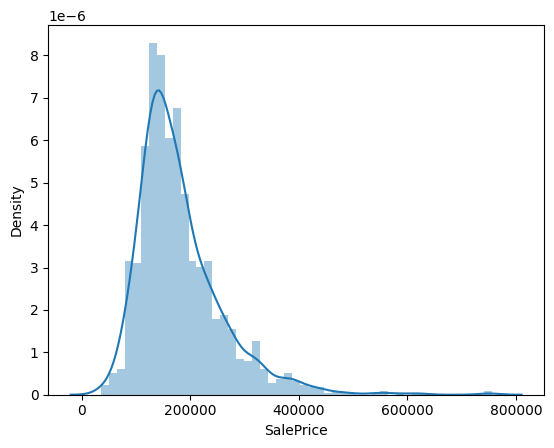

In [ ]:
## Check if y is a skewed distribution
sns.distplot(y)
print(y.skew())

In [ ]:
## Use log transformation to remove skewness
y_bc = np.log(y)

0.12193841342297697


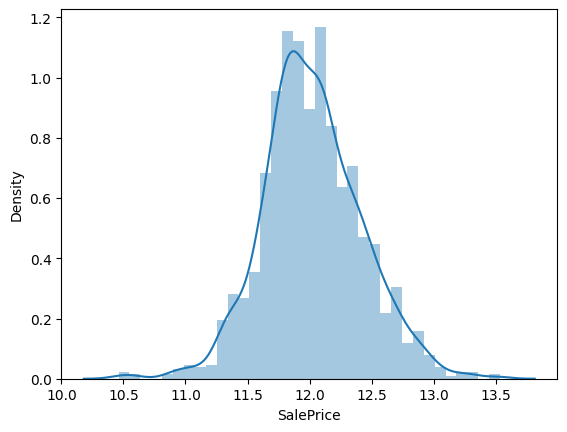

In [ ]:
## Draw the histogram of y after the log transformation
sns.distplot(y_bc)
print(y_bc.skew())

In [ ]:
from sklearn.model_selection import train_test_split
## split X, y_bc into training and testing sets with training proportion as 0.8
## set random_state = 100
X_train, X_test, y_train, y_test = train_test_split(X, y_bc, test_size =0.2, shuffle=True, random_state=100)

In [ ]:
X_train.shape

(1160, 90)

In [ ]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
624,60,80.0,10400,6,5,1972,1972,288.0,2,2,...,0,0,0,0,0,0,0,0,0,1
592,20,60.0,6600,5,8,1982,2003,0.0,2,3,...,0,0,0,0,0,0,0,0,0,0
48,190,33.0,4456,4,5,1920,2008,0.0,2,2,...,0,0,1,1,0,0,0,0,0,0
1070,20,72.0,10152,5,5,1956,1956,120.0,2,2,...,0,0,0,0,0,0,0,0,0,0
1234,70,55.0,8525,5,6,1911,1950,0.0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## Outlier treatment
## Checking percentage of outliers in each continuous numeric feature
outliers_percentage={}
numeric_df = X_train.select_dtypes(include=['int64', 'float64'])
cols = ['SalePrice','YearBuilt','OverallCond', 'OverallQual', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
           'FullBath', 'MoSold', 'Yrsold', 'BsmtQual', 'ExterCond','BsmtExposure', 'BsmtFinType2','BsmtCond',
            'TotRmsAbvGrd','GarageCond','GarageQual', 'KitchenAbvGr', 'LowQualFinSF','Fireplaces']
for feature in numeric_df.columns:
    if feature not in cols:
        IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
        outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
        outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)

outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
19,EnclosedPorch,14.48
8,BsmtFinSF2,11.47
21,ScreenPorch,8.19
0,MSSubClass,7.16
4,MasVnrArea,6.55
1,LotFrontage,5.78
18,OpenPorchSF,5.34
2,LotArea,4.74
22,MiscVal,3.88
17,WoodDeckSF,1.81


In [ ]:
## Outlier Treatment
for feature, percent in outliers_percentage.items():
    if percent > 0:
        ## find the IQR of each feature (1 point)
        Q1= X_train[feature].quantile(0.25)
        Q3= X_train[feature].quantile(0.75)
        IQR= Q3-Q1

        ## find the maximum upper fence point of a box plot, which is
        ## the 75% quantile + 1.5*IQR (1 point)
        max_value= Q3 + (1.5*IQR)

        ## find the minimum lower fence point of a box plot, which is
        ## the 25% quantile - 1.5*IQR (1 point)
        min_value= Q1-(1.5*IQR)

        ## replace all the observations of feature that is larger than
        ## max_value with max_value in both training set and testing set (1 point)
        X_train.loc[X_train[feature] > max_value, feature] = max_value

        ## replace all the observations of feature that is larger than
        ## min_value with min_value in both training set and testing set (1 point)
        X_train.loc[X_train[feature] < min_value, feature] = min_value

        print(feature, IQR, min_value, max_value)

MSSubClass 50.0 -55.0 145.0
LotFrontage 21.0 27.5 111.5
LotArea 4088.0 1368.0 17720.0
MasVnrArea 169.0 -253.5 422.5
BsmtFinSF1 705.25 -1057.875 1763.125
BsmtFinSF2 0.0 0.0 0.0
BsmtUnfSF 589.5 -657.75 1700.25
1stFlrSF 509.0 118.5 2154.5
2ndFlrSF 729.25 -1093.875 1823.125
GarageArea 240.0 -24.0 936.0
WoodDeckSF 168.0 -252.0 420.0
OpenPorchSF 70.0 -105.0 175.0
EnclosedPorch 0.0 0.0 0.0
3SsnPorch 0.0 0.0 0.0
ScreenPorch 0.0 0.0 0.0
MiscVal 0.0 0.0 0.0


# Remark
Many features have outliers

Dropping all the outliers will cause loss of information.

Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 IQR, 75th percentile + 1.5 IQR]
IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.

Target column 'SalePrice' is excluded in this since this is our target variable(Important point)!

Some other features are also excluded since those are ordered categorical type which are labelled encoded to numeric form.

In [ ]:
## Check for Null values
def null_values(dataf):
    for feat in dataf.columns:
        if dataf[feat].isnull().any():
            print(feat+" : "+str(dataf[feat].isnull().sum()))

In [ ]:
## Apply null_values function to X_train and X_test
null_values(X_train)
print("-----------")
null_values(X_test)

LotFrontage : 204
-----------
LotFrontage : 53


In [ ]:
X_train['LotFrontage'].dtype

dtype('float64')

In [ ]:
## Imputing missing values with mean of train data since outliers are already removed.
imputed_value = np.mean(X_train['LotFrontage'])
print("Mean:",imputed_value)
## Replace the missing values with the mean of the training data in both
## training set and testing set
X_train['LotFrontage'].fillna(imputed_value, inplace = True)
X_test['LotFrontage'].fillna(imputed_value, inplace = True)

Mean: 69.043410041841


In [ ]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
624,60,80.0,10400,6,5,1972,1972,288.0,2,2,...,0,0,0,0,0,0,0,0,0,1
592,20,60.0,6600,5,8,1982,2003,0.0,2,3,...,0,0,0,0,0,0,0,0,0,0
48,145,33.0,4456,4,5,1920,2008,0.0,2,2,...,0,0,1,1,0,0,0,0,0,0
1070,20,72.0,10152,5,5,1956,1956,120.0,2,2,...,0,0,0,0,0,0,0,0,0,0
1234,70,55.0,8525,5,6,1911,1950,0.0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
357,120,44.00000,4224,5,5,1976,1976,0.0,2,2,...,1,0,0,0,0,0,0,0,0,0
824,20,81.00000,11216,8,5,2006,2006,0.0,3,2,...,0,0,1,1,0,0,0,0,0,0
369,20,69.04341,9830,5,7,1959,2006,0.0,2,3,...,0,0,0,0,0,0,0,0,0,0
291,190,55.00000,5687,5,6,1912,2000,0.0,2,1,...,0,0,0,0,0,0,0,0,0,0
134,20,78.00000,10335,5,6,1968,1993,0.0,2,2,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
## Scale the features
sscaler = StandardScaler()
sscaler.fit(X_train)

## transform() performs standardization (mean/std) by centering and scaling.
X_train_sc = pd.DataFrame(data=sscaler.transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(data=sscaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_train_sc.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
0,0.116468,0.615582,0.214140,-0.087362,-0.534765,0.020058,-0.637763,1.451500,-0.687959,-0.259461,...,-0.355266,-0.196204,-0.291764,-0.295229,-0.171118,-0.212238,-0.16843,-0.212238,-0.135784,7.364652
1,-0.946286,-0.508092,-0.844471,-0.816429,2.210046,0.352440,0.882552,-0.671149,-0.687959,2.662621,...,-0.355266,-0.196204,-0.291764,-0.295229,-0.171118,-0.212238,-0.16843,-0.212238,-0.135784,-0.135784
2,2.374819,-2.025052,-1.441751,-1.545496,-0.534765,-1.708331,1.127764,-0.671149,-0.687959,-0.259461,...,-0.355266,-0.196204,3.427427,3.387199,-0.171118,-0.212238,-0.16843,-0.212238,-0.135784,-0.135784
3,-0.946286,0.166112,0.145052,-0.816429,-0.534765,-0.511754,-1.422441,0.213288,-0.687959,-0.259461,...,-0.355266,-0.196204,-0.291764,-0.295229,-0.171118,-0.212238,-0.16843,-0.212238,-0.135784,-0.135784
4,0.382156,-0.789011,-0.308201,-0.816429,0.380172,-2.007476,-1.716695,-0.671149,-0.687959,-0.259461,...,-0.355266,-0.196204,-0.291764,-0.295229,-0.171118,-0.212238,-0.16843,-0.212238,-0.135784,-0.135784


In [ ]:
X_test_sc.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
0,1.710598,-1.407032,-1.506382,-0.816429,-0.534765,0.153011,-0.441593,-0.671149,-0.687959,-0.259461,...,2.814796,-0.196204,-0.291764,-0.295229,-0.171118,-0.212238,-0.16843,-0.212238,-0.135784,-0.135784
1,-0.946286,0.671766,0.441463,1.370772,-0.534765,1.150158,1.029679,-0.671149,1.062112,-0.259461,...,-0.355266,-0.196204,3.427427,3.387199,-0.171118,-0.212238,-0.16843,-0.212238,-0.135784,-0.135784
2,-0.946286,0.000000,0.055348,-0.816429,1.295109,-0.412040,1.029679,-0.671149,-0.687959,2.662621,...,-0.355266,-0.196204,-0.291764,-0.295229,-0.171118,-0.212238,-0.16843,-0.212238,-0.135784,-0.135784
3,3.570417,-0.789011,-1.098816,-0.816429,0.380172,-1.974237,0.735425,-0.671149,-0.687959,-3.181542,...,-0.355266,-0.196204,-0.291764,-0.295229,-0.171118,-0.212238,-0.16843,-0.212238,-0.135784,-0.135784
4,-0.946286,0.503214,0.196032,-0.816429,0.380172,-0.112895,0.392128,-0.671149,-0.687959,-0.259461,...,2.814796,-0.196204,-0.291764,-0.295229,-0.171118,-0.212238,-0.16843,-0.212238,7.364652,-0.135784


# Model Fitting, Parameter Tuning, and Model Evaluation

In [ ]:
y_train.head()

,Unnamed: 0,SalePrice
0,624,12.014609
1,592,11.835009
2,48,11.635143
3,1070,11.813030
4,1234,11.775290


In [ ]:
y_train = y_train['SalePrice']
y_test = y_test['SalePrice']

In [ ]:
y_train.head()

0    12.014609
1    11.835009
2    11.635143
3    11.813030
4    11.775290
Name: SalePrice, dtype: float64

In [ ]:
y_test.head()

0    11.805595
1    12.357076
2    11.995352
3    11.819675
4    12.100712
Name: SalePrice, dtype: float64

In [ ]:
## Fit a Lasso Regression
from sklearn.linear_model import Ridge, Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred =  lasso.predict(X_test)

### Model evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))

R2 score (train) :  0.684
R2 score (test) :  0.6925
RMSE (train) :  0.2246
RMSE (test) :  0.221


In [ ]:
## alpha 0.00125
## fit a new lasso model
## fit it with X_train and y_train
## make predictions for the training set and testing set
## Perform model evaluation using both training lables and testing labels
## using both r2_score and rmse
from sklearn.linear_model import Ridge, Lasso
lasso = Lasso(alpha=0.00125)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred =  lasso.predict(X_test)

### Model evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))

R2 score (train) :  0.9092
R2 score (test) :  0.8923
RMSE (train) :  0.1204
RMSE (test) :  0.1308


In [ ]:
## alpha 0.5
## Fit a Lasso Regression
from sklearn.linear_model import Ridge, Lasso
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred =  lasso.predict(X_test)

### Model evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))

R2 score (train) :  0.0001
R2 score (test) :  -0.0017
RMSE (train) :  0.3995
RMSE (test) :  0.3988


In [ ]:
from ast import Num
## Hold-out cross-validation
## If I want to check the effect of different values of the tuning parameter
## in the LASSO penalty on the prediction performance, write a function
## that takes a sequence of alpha values as input and returns the result of R2
## score and RMSE of y_train and y_test
import numpy as np

## Objectives of writing functions, reduce repetitive labours and
## avoid copy paste error
def ModelTrainAndEvaluation(alphaValues, xtrain, xtest, ytrain, ytest):
    """
    Parameters:

    -alphaValues: a vector of different tuning parameter values
    -xtrain: the training dataset
    -xtest: the testing set
    -ytrain: target var for training set
    -ytest: target var for testing set

    Output:
    returns a dictionary that stores the r2, rmse of the training and
    testing set respectively. Choose a dictionary data structure to
    save the result
    """

    ## Define data structures to store your results
    ## first, get the number of different values
    num = len(alphaValues)
    r2train = np.zeros(num)
    rmsetrain = np.zeros(num)
    r2test = np.zeros(num)
    rmsetest = np.zeros(num)

    ## Model fitting and evaluation with diffferent tuning parameters
    for i in range(num):
        lasso = Lasso(alpha=alphaValues[i])
        lasso.fit(xtrain, ytrain)

        y_train_pred = lasso.predict(xtrain)
        y_test_pred = lasso.predict(xtest)
        r2train[i] = round(r2_score(ytrain, y_train_pred), 4)
        r2test[i] = round(r2_score(ytest, y_test_pred), 4)

        rmsetrain[i] = round(np.sqrt(mean_squared_error(ytrain, y_train_pred)), 4)
        rmsetest[i] = round(np.sqrt(mean_squared_error(ytest, y_test_pred)), 4)

    ## save all the results in a dictionary

    result = {
            'r2train': r2train,
            'rmsetrain': rmsetrain,
            'r2test': r2test,
            'rmsetest': rmsetest
        }

    return result

[ 0.8875  0.8892  0.891   0.8916  0.892   0.8923  0.8935  0.8932  0.8877
  0.6925 -0.0013]
[0.1336 0.1327 0.1316 0.1312 0.1309 0.1308 0.1301 0.1302 0.1336 0.221
 0.3988]


In [ ]:
## Model selection
## How to choose the best tunning parameter?
import numpy as np
rmseValues = result['rmsetest']
rmseValues

## find the minimum value of the rmse
minValue=min(rmseValues)
print(minValue)

## find the index of the minimum rmse values
minInd=np.argmin(rmseValues)
print(minInd)

## using this index and find the corresponding alpha value
bestAlpha = alphaValues[minInd]
print(bestAlpha)

0.1301
6
0.0025


In [ ]:
## Can you change this into a function
## with alphaValues and rmseValues as input parameters
## return the minimum rmse value,
## the index of the minimum rmse value
## the corresponding alpha value
def tuningParamSelection(alphaValues, rmseValues):
    """
    Parameters:

    -rmseValues: a list or an numpy array of rmse values
    -alphaValues: a vector of different tuning parameter values

    Output:
    returns a dictionary that stores index of the minimum
    rmse and the corresponding alpha value that has the min rmse
    save the result in a dictionary and return it

    """
    ## find the minimum value of the rmse
    minValue=min(rmseValues)
    print(minValue)

    ## find the index of the minimum rmse values
    minInd=np.argmin(rmseValues)
    print(minInd)

    ## using this index and find the corresponding alpha value
    bestAlpha = alphaValues[minInd]
    print(bestAlpha)

    ## save minInd and bestAlpha into a dictionary
    result = dict()
    result['minInd'] = minInd
    result['bestAlpha'] = bestAlpha
    return result

0.1301
6
0.0025
{'minInd': 6, 'bestAlpha': 0.0025}


In [ ]:
## K fold cross-validation
folds = KFold(n_splits = 5)
params = {'alpha': [0.0001, 0.00025,  0.0005, 0.00065, 0.001, 0.00125, 0.0025,0.005, 0.01, 0.1, 1]} ## candiate parameters

model = Lasso()
## GridSearch and Model training
model_cv = GridSearchCV(estimator = model,
                              param_grid = params,
                              scoring= 'r2',
                              cv = folds,
                              return_train_score=True,
                              verbose = 1)

## use model_cv to fit with X_train and y_train
model_cv.fit(X_train,y_train)

## get the best alpha
alpha = model_cv.best_params_['alpha']
print("Optimum alpha for %s is %f" %(model, alpha))

## get the best estimator from model_cv and set it as final_model
final_model = model_cv.best_estimator_

## use final_model to fit with X_train and y_train
final_model.fit(X_train, y_train)

## Model Prediction using X_train and X_test respectively
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

## Model Evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))

## save the cross validation results into a data frame
cvResults = pd.DataFrame(model_cv.cv_results_)
cvResults.head(5)

cvResults['param_alpha'] = cvResults['param_alpha'].astype('float32')
print(cvResults)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Optimum alpha for Lasso() is 0.002500
R2 score (train) :  0.9077
R2 score (test) :  0.8935
RMSE (train) :  0.1214
RMSE (test) :  0.1301
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0        0.071167      0.026655         0.010995        0.004084      0.00010   
1        0.075414      0.028129         0.011703        0.005493      0.00025   
2        0.054813      0.007928         0.014263        0.003884      0.00050   
3        0.038996      0.015632         0.015298        0.004688      0.00065   
4        0.043392      0.012641         0.017415        0.005967      0.00100   
5        0.077375      0.010168         0.025135        0.008561      0.00125   
6        0.064560      0.014239         0.029850        0.012421      0.00250   
7        0.041544      0.014056         0.017694        0.007827      0.00500   
8        0.041593      0.006279         0.021792        0.004481      0.01

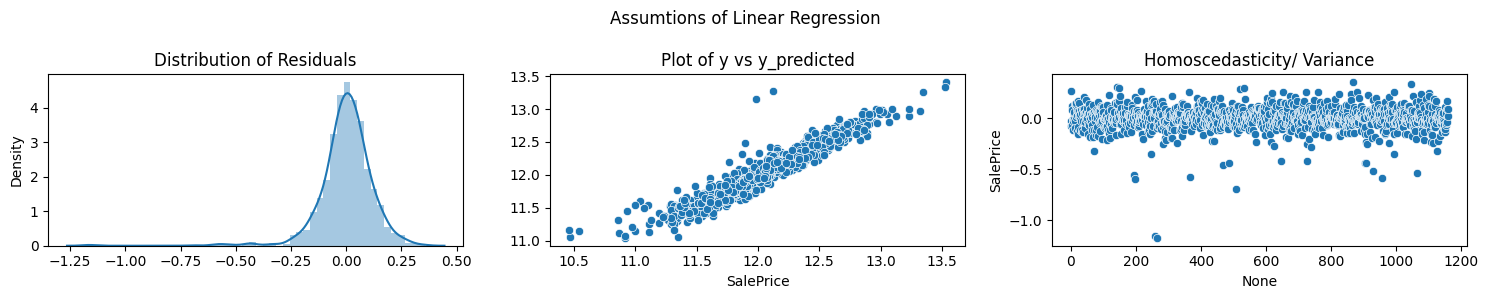

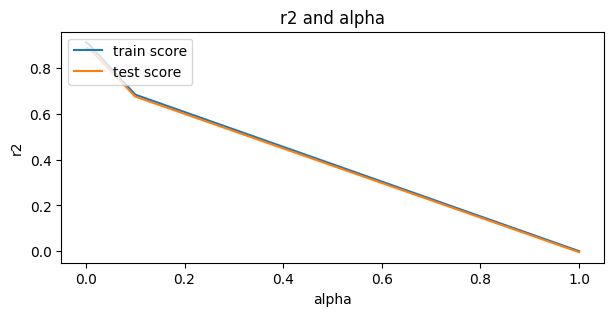

In [ ]:
## Model Assumptions and Diagnostics
fig, axes = plt.subplots(1, 3, figsize=(15,3))
fig.suptitle('Assumtions of Linear Regression')

## fill out the code here plot the distribution of y_train.iloc[:, 1] -  y_train_pred[:,1]
sns.distplot(x=y_train -y_train_pred, ax=axes[0])
axes[0].set_title('Distribution of Residuals')

## fill out the scatterplot of y_train_pred[:, 1] and y_train.iloc[:,1]
sns.scatterplot(x=y_train, y= y_train_pred, ax=axes[1])
axes[1].set_title('Plot of y vs y_predicted')


## fill out the scatterplot of X_train.index and y_train.iloc[:, 1]-y_train_pred[:, 1]
sns.scatterplot(x=X_train.index, y= y_train -y_train_pred, ax=axes[2])
axes[2].set_title('Homoscedasticity/ Variance')
plt.tight_layout()

## plotting
fig = plt.figure(figsize=(7,3))

## use plt.plot to draw cvResults['param_alpha'] as x axis
## and use cvResults['mean_train_score'] as y axis
plt.plot(cvResults['param_alpha'],cvResults['mean_train_score'])



## use plt.plot to draw cvResults['param_alpha'] as x axis
## and use cvResults['mean_test_score'] as y axis
plt.plot(cvResults['param_alpha'], cvResults['mean_test_score'])


plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Optimum alpha for Lasso() is 0.002500
R2 score (train) :  0.9077
R2 score (test) :  0.8935
RMSE (train) :  0.1214
RMSE (test) :  0.1301
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0        0.054731      0.025119         0.009969        0.001631      0.00010   
1        0.023648      0.008274         0.004581        0.000120      0.00025   
2        0.043140      0.013851         0.010447        0.003987      0.00050   
3        0.030616      0.017079         0.007389        0.002440      0.00065   
4        0.019577      0.004181         0.008252        0.003153      0.00100   
5        0.019028      0.006834         0.007507        0.003142      0.00125   
6        0.020271      0.005517         0.009512        0.003365      0.00250   
7        0.009646      0.000264         0.004121        0.000100      0.00500   
8        0.016781      0.006175         0.007037        0.002374      0.01

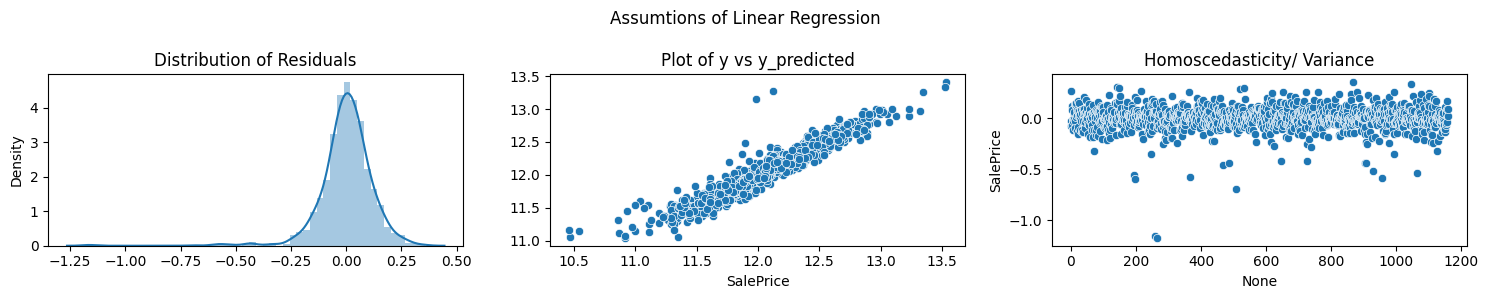

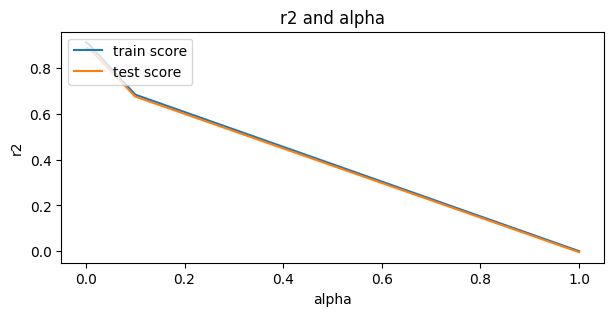

In [ ]:
## Combine the K-fold cross validation and model diagnostics into a function.
## The input of the function should include:
## 1. Lasso() model
## 2. params should be a dictionary of the candidate alpha values
## 3. dataset, xtrain, xtest ytrain, ytest
## scoring criterion should be r2
## return the final model selected by cross validation that has
## the largest r2 value

def ModelTrainAndEvaluaion(model, params, xtrain, xtest, ytrain, ytest):
  folds = KFold(n_splits = 5)

  model = Lasso()
  ## GridSearch and Model training
  model_cv = GridSearchCV(estimator = model,
                                param_grid = params,
                                scoring= 'r2',
                                cv = folds,
                                return_train_score=True,
                                verbose = 1)

  ## use model_cv to fit with X_train and y_train
  model_cv.fit(X_train,y_train)

  ## get the best alpha
  alpha = model_cv.best_params_['alpha']
  print("Optimum alpha for %s is %f" %(model, alpha))

  ## get the best estimator from model_cv and set it as final_model
  final_model = model_cv.best_estimator_

  ## use final_model to fit with X_train and y_train
  final_model.fit(X_train, y_train)

  ## Model Prediction using X_train and X_test respectively
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)

  # Model Evaluation
  print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
  print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
  print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
  print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))

  ## save the cross validation results into a data frame
  cvResults = pd.DataFrame(model_cv.cv_results_)
  cvResults.head(5)

  cvResults['param_alpha'] = cvResults['param_alpha'].astype('float32')
  print(cvResults)

  fig, axes = plt.subplots(1, 3, figsize=(15,3))
  fig.suptitle('Assumtions of Linear Regression')

  ## fill out the code here plot the distribution of y_train.iloc[:, 1] -  y_train_pred[:,1]
  sns.distplot(x=y_train -y_train_pred, ax=axes[0])
  axes[0].set_title('Distribution of Residuals')

  ## fill out the scatterplot of y_train_pred[:, 1] and y_train.iloc[:,1]
  sns.scatterplot(x=y_train, y= y_train_pred, ax=axes[1])
  axes[1].set_title('Plot of y vs y_predicted')

  ### fill out the scatterplot of X_train.index and y_train.iloc[:, 1]-y_train_pred[:, 1]
  sns.scatterplot(x=X_train.index, y= y_train -y_train_pred, ax=axes[2])
  axes[2].set_title('Homoscedasticity/ Variance')
  plt.tight_layout()

  ## plotting
  fig = plt.figure(figsize=(7,3))
  plt.plot(cvResults['param_alpha'],cvResults['mean_train_score'])
  plt.plot(cvResults['param_alpha'], cvResults['mean_test_score'])
  plt.xlabel('alpha')
  plt.ylabel('r2')
  plt.title("r2 and alpha")
  plt.legend(['train score', 'test score'], loc='upper left')
  plt.show()

  return final_model

Fitting 5 folds for each of 29 candidates, totalling 145 fits
Optimum alpha for Lasso() is 0.100000
R2 score (train) :  0.684
R2 score (test) :  0.6925
RMSE (train) :  0.2246
RMSE (test) :  0.221
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0        0.017241      0.002277         0.008852        0.000500          0.1   
1        0.015582      0.000750         0.007494        0.001455          0.2   
2        0.017455      0.004500         0.009820        0.002766          0.3   
3        0.010400      0.005180         0.004907        0.001753          0.4   
4        0.014203      0.004036         0.006303        0.001912          0.5   
5        0.011209      0.004223         0.005968        0.002525          0.6   
6        0.006130      0.000101         0.003668        0.000051          0.7   
7        0.007378      0.001379         0.004303        0.000752          0.8   
8        0.011269      0.004786         0.004520        0.001313          0

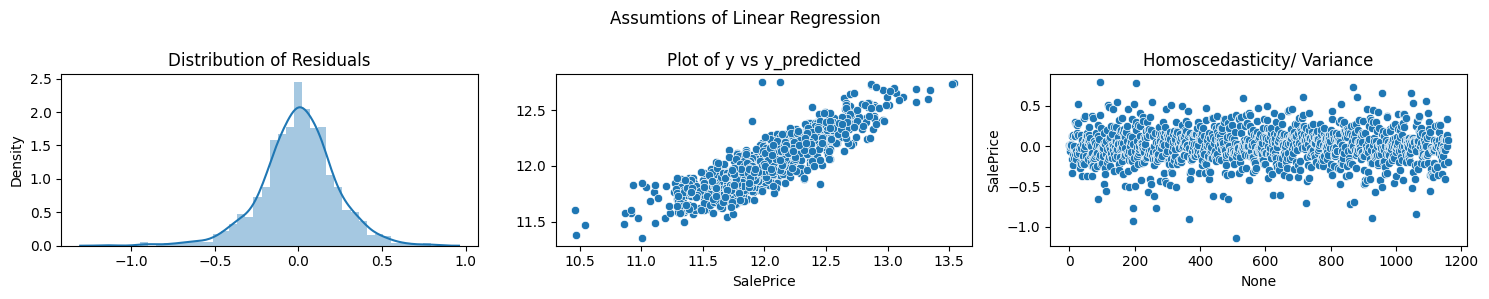

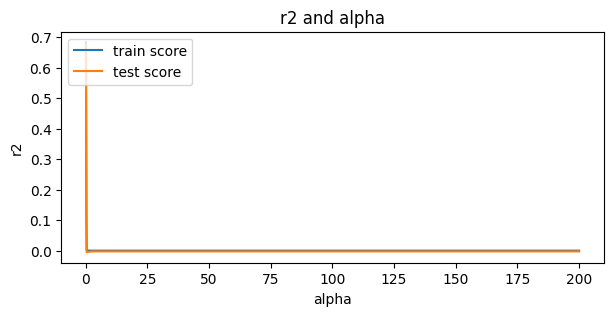

In [ ]:
## Use the function ModelTrainAndEvaluaion to fit a ridge regression with the
## following parameters params
params = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                        9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,200]}

ridge = ModelTrainAndEvaluaion(Ridge(), params=params,
                                    xtrain=X_train, xtest=X_test, ytrain=y_train, ytest=y_test)
